# Bring the Data

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'merged_dataset_fall.xlsx'
df = pd.read_excel(file_path)

In [104]:
df.head(10)

,Number,Year,Date of incident,Weekday of incident,Shift,Hospital department or location of incident,Age range of patient,"Type of injury incurred, if any",Presence of companion at time of incident,Location or environment in which the incident ocurred,Fall risk level,Reason for incident,Whether a fall prevention protocol was implemented,Involvement of medication associated with fall risk,Severity of incident,Sex,Whether a restraint prescription was given,Whether a physical therapy prescription was given,Birth decade of patient
0,1,2012,2012-01-02 00:00:00,monday,Afternoon,diagnostic support,60<70,Bruising,No,Waiting room,Moderate,Loss of balance,No,No,adverse event,Female,NaN,NaN,NaN
1,2,2012,2012-01-06 00:00:00,friday,Night,inpatient units,40<50,cut,No,Room,Moderate,Trip,Yes,No,adverse event,Female,NaN,NaN,NaN
2,3,2012,2012-01-10 00:00:00,tuesday,Afternoon,emergency depart,80<90,cut,Yes/Family,Room,High,Trip,Yes,Yes,adverse event,Male,NaN,NaN,NaN
3,4,2012,2012-01-14 00:00:00,saturday,Night,inpatient units,70<80,no injury,No,Room,High,Mental confusion,Yes,No,adverse event,Male,NaN,NaN,NaN
4,5,2012,2012-01-24 00:00:00,tuesday,Night,inpatient units,70<80,no injury,Yes/Family,Bathroom/shower,Moderate,Slip,Yes,No,adverse event,Female,NaN,NaN,NaN
5,6,2012,2012-01-24 00:00:00,tuesday,Morning,inpatient units,80<90,no injury,yes/Nurse,Room,High,Slip,Yes,Yes,adverse event,Male,NaN,NaN,NaN
6,7,2012,2012-01-30 00:00:00,monday,Afternoon,inpatient units,60<70,no injury,No,Bathroom/shower,Moderate,Mental confusion,Yes,Yes,adverse event,Female,NaN,NaN,NaN
7,8,2012,2012-02-03 00:00:00,friday,Afternoon,inpatient units,70<80,no injury,No,Bathroom/shower,High,Slip,Yes,Yes,adverse event,Male,NaN,NaN,NaN
8,9,2012,2012-02-04 00:00:00,saturday,Afternoon,inpatient units,20<30,no injury,Yes/Family,Bathroom/shower,Moderate,Hypotension,Yes,No,adverse event,Male,NaN,NaN,NaN
9,10,2012,2012-02-04 00:00:00,saturday,Morning,inpatient units,40<50,no injury,No,Room,Moderate,Motor Deficit,Yes,No,adverse event,Male,NaN,NaN,NaN


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Number                                                 1070 non-null   int64 
 1   Year                                                   1070 non-null   int64 
 2   Date of incident                                       1070 non-null   object
 3   Weekday of incident                                    1070 non-null   object
 4   Shift                                                  1070 non-null   object
 5   Hospital department or location of incident            1070 non-null   object
 6   Age range of patient                                   1070 non-null   object
 7   Type of injury incurred, if any                        1070 non-null   object
 8   Presence of companion at time of incident              106

# Missing Values

In [106]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

train_missing= missing_values_table(df)
train_missing

Your selected dataframe has 19 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Birth decade of patient,509,47.6
Whether a physical therapy prescription was given,465,43.5
Whether a restraint prescription was given,310,29.0
Presence of companion at time of incident,1,0.1
Fall risk level,1,0.1
Sex,1,0.1


<Axes: >

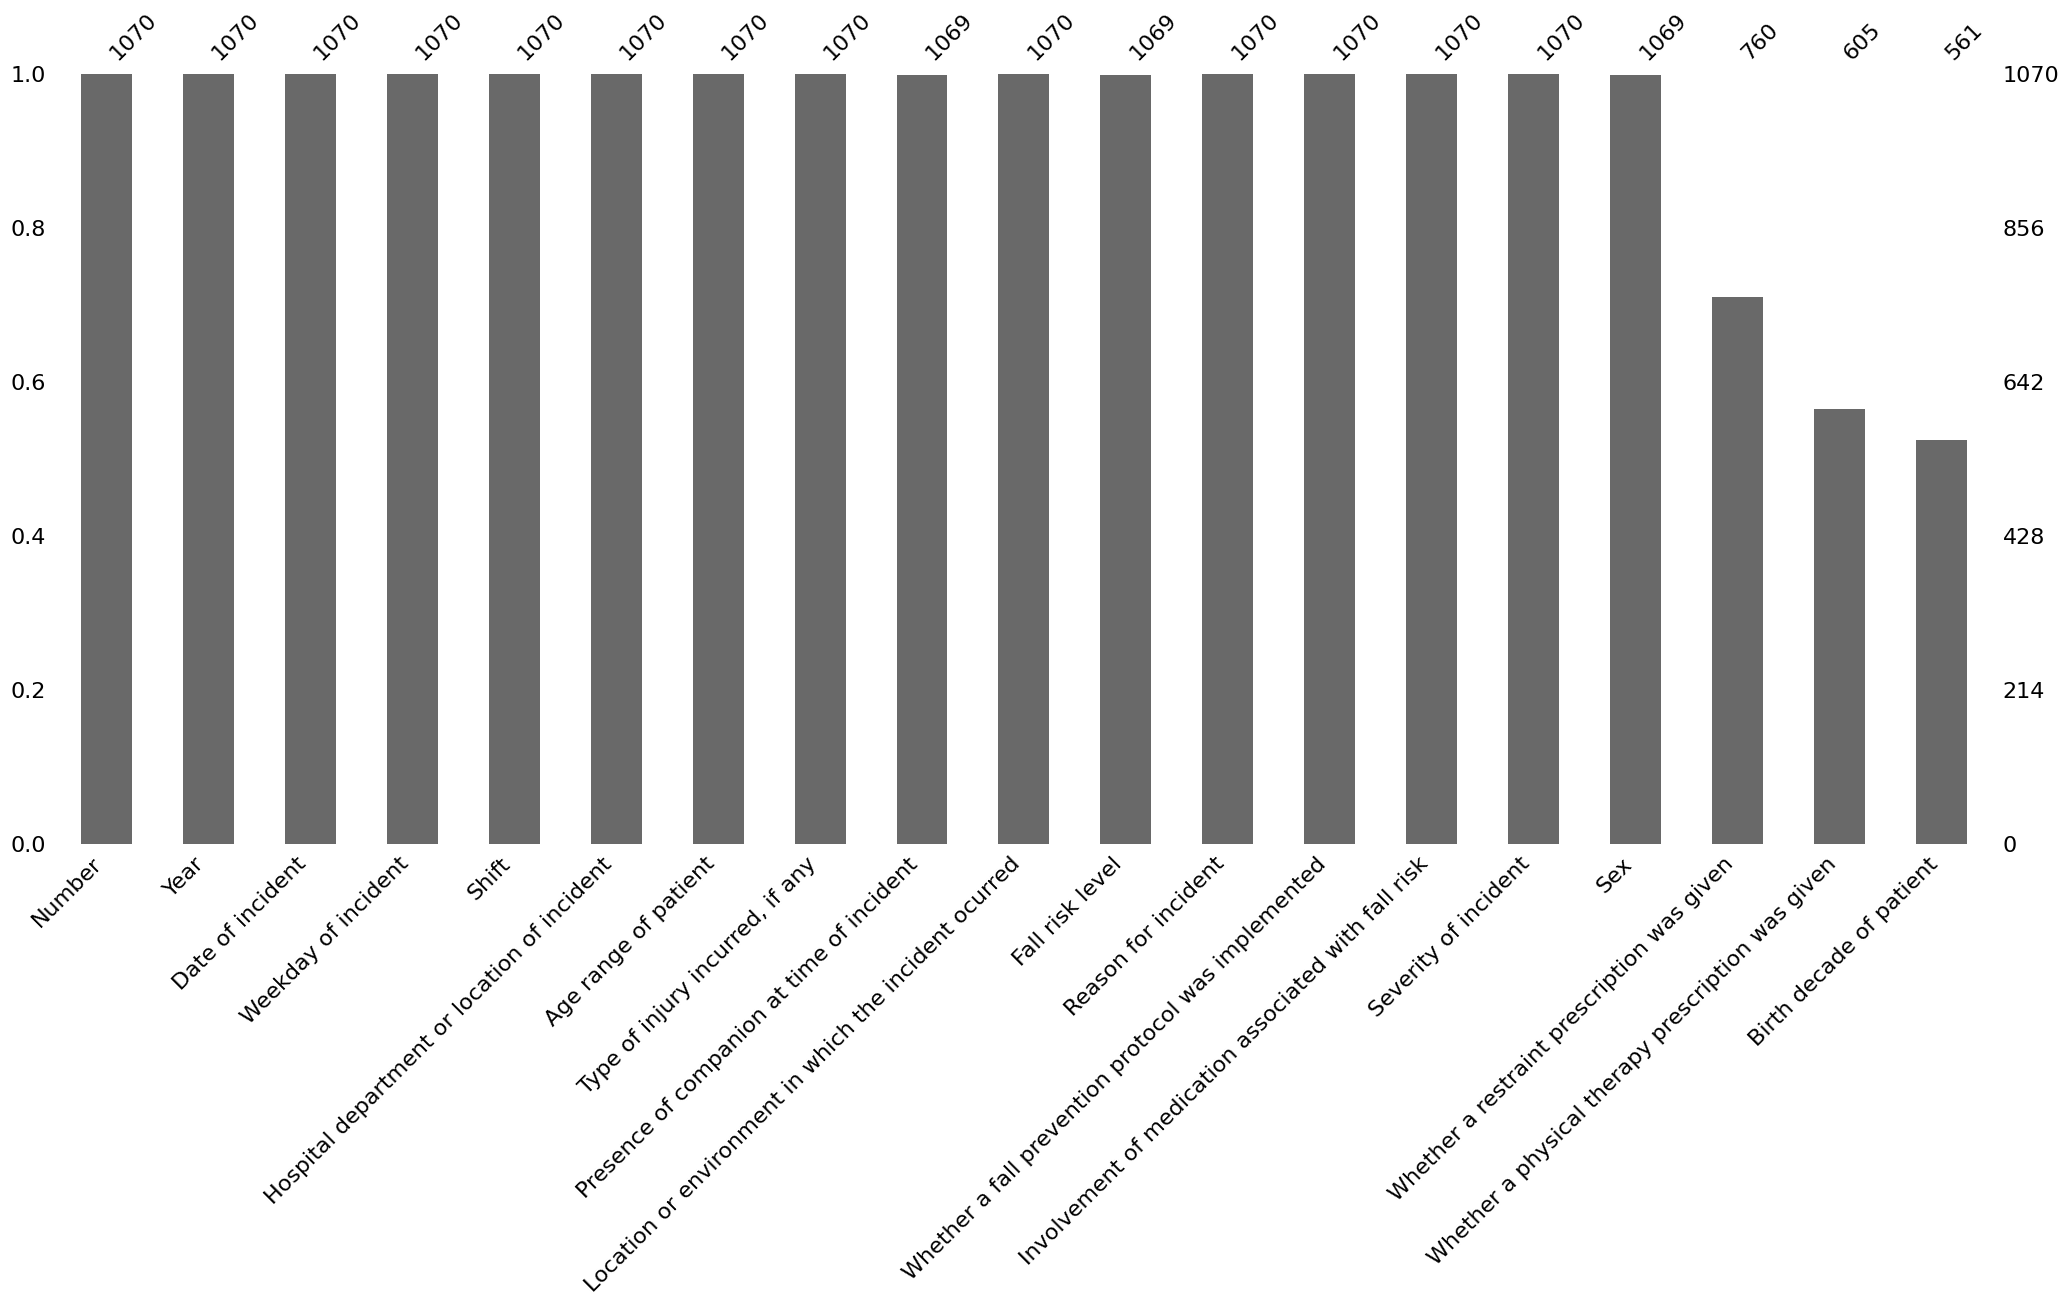

In [107]:
import missingno as msno
msno.bar(df)

In [108]:
df.isnull().sum()

Number                                                     0
Year                                                       0
Date of incident                                           0
Weekday of incident                                        0
Shift                                                      0
Hospital department or location of incident                0
Age range of patient                                       0
Type of injury incurred, if any                            0
Presence of companion at time of incident                  1
Location or environment in which the incident ocurred      0
Fall risk level                                            1
Reason for incident                                        0
Whether a fall prevention protocol was implemented         0
Involvement of medication associated with fall risk        0
Severity of incident                                       0
Sex                                                        1
Whether a restraint pres

## Missing Value Imputation

In [109]:
from sklearn.impute import SimpleImputer
train_most_frequent = df.copy()
# strategy to 'mean' to impute by the mean
mean_imputer = SimpleImputer(strategy='most_frequent')  # strategy can also be mean or median
train_most_frequent.iloc[:,:] = mean_imputer.fit_transform(train_most_frequent)

train_most_frequent.isnull().sum()


Number                                                   0
Year                                                     0
Date of incident                                         0
Weekday of incident                                      0
Shift                                                    0
Hospital department or location of incident              0
Age range of patient                                     0
Type of injury incurred, if any                          0
Presence of companion at time of incident                0
Location or environment in which the incident ocurred    0
Fall risk level                                          0
Reason for incident                                      0
Whether a fall prevention protocol was implemented       0
Involvement of medication associated with fall risk      0
Severity of incident                                     0
Sex                                                      0
Whether a restraint prescription was given              

In [110]:
df = train_most_frequent

# Reponse Variable (Type of Fall Injury)

In [111]:
df['Type of injury incurred, if any'].value_counts()

Type of injury incurred, if any
no injury             764
excoriation           121
cut                    65
HEMATOMA               43
Bruising               26
EDEMA                  22
Fracture               15
Head trauma             5
Fracture                4
HEMATOMA                2
Spinal cord injury      1
excotiation             1
Wound dehiscence        1
Name: count, dtype: int64

In [112]:
import plotly.express as px

fig_injuries = px.pie(df, names='Type of injury incurred, if any', title='Types of Injuries')

fig_injuries.update_layout(width=800, height=600)

# Show the plot
fig_injuries.show()

# Data Cleaning

In [113]:
import pandas as pd

mapping = {'no injury': 0, 'excoriation': 1, 'cut': 1, 'HEMATOMA': 1, 'Bruising': 1, 'EDEMA': 1,
           'Fracture': 1, 'Head trauma': 1, 'excotiation': 1, 'Spinal cord injury': 1, 'Wound dehiscence': 1}

df['Type of injury incurred, if any'] = df['Type of injury incurred, if any'].map(mapping)

df['Type of injury incurred, if any']


0       1.0
1       1.0
2       1.0
3       0.0
4       0.0
       ... 
1065    1.0
1066    1.0
1067    1.0
1068    1.0
1069    0.0
Name: Type of injury incurred, if any, Length: 1070, dtype: float64

In [115]:
df['Type of injury incurred, if any'].value_counts()

Type of injury incurred, if any
0.0    764
1.0    295
Name: count, dtype: int64

In [116]:
df['Fall risk level']

0       Moderate
1       Moderate
2           High
3           High
4       Moderate
          ...   
1065         Low
1066        High
1067    Moderate
1068        High
1069        High
Name: Fall risk level, Length: 1070, dtype: object

In [118]:
import plotly.express as px

fig_injuries = px.pie(df, names='Fall risk level', title='Fall Risk Level')

fig_injuries.update_layout(width=800, height=600)

# Show the plot
fig_injuries.show()

In [119]:
# Define the mapping
label_mapping = {"Low": 0, "Moderate": 1, "High": 2}


df['Fall risk level'] = df['Fall risk level'].map(label_mapping)

In [120]:
df['Fall risk level']

0       1
1       1
2       2
3       2
4       1
       ..
1065    0
1066    2
1067    1
1068    2
1069    2
Name: Fall risk level, Length: 1070, dtype: int64

In [121]:
# Define the mapping
label_mapping = {"No": 0, "Yes": 1}


df['Whether a fall prevention protocol was implemented'] = df['Whether a fall prevention protocol was implemented'].map(label_mapping)

In [122]:
df['Age range of patient'].value_counts()

Age range of patient
70<80    281
80<90    230
60<70    194
50<60     97
40<50     73
30<40     59
≥ 90      53
20<30     37
1<13      23
1<13      11
< 1        7
13<20      5
Name: count, dtype: int64

In [123]:
# Mapping dictionary
age_mapping = {
    "60<70": 65,
    "50<60": 55,
    "40<50": 45,
    "80<90": 85,
    "70<80": 75,
    "30<40": 35,
    "20<30": 25,
    "1<13": 7,
    "1<13": 7,
    "13<20": 16,
    "≥ 90": 90,
    "< 1": 1
}

df['Age range of patient'] = df['Age range of patient'].map(age_mapping)

df['Age range of patient'].value_counts()


Age range of patient
75.0    281
85.0    230
65.0    194
55.0     97
45.0     73
35.0     59
90.0     53
25.0     37
7.0      23
1.0       7
16.0      5
Name: count, dtype: int64

In [124]:
df['Age range of patient'].fillna(7, inplace=True)

In [125]:
df['Type of injury incurred, if any'].fillna(1, inplace=True)

In [126]:
df.isnull().sum()

Number                                                   0
Year                                                     0
Date of incident                                         0
Weekday of incident                                      0
Shift                                                    0
Hospital department or location of incident              0
Age range of patient                                     0
Type of injury incurred, if any                          0
Presence of companion at time of incident                0
Location or environment in which the incident ocurred    0
Fall risk level                                          0
Reason for incident                                      0
Whether a fall prevention protocol was implemented       0
Involvement of medication associated with fall risk      0
Severity of incident                                     0
Sex                                                      0
Whether a restraint prescription was given              

In [127]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Compute summary statistics
summary_stats = df[numerical_cols].describe()
summary_stats

,Number,Year,Age range of patient,"Type of injury incurred, if any",Fall risk level,Whether a fall prevention protocol was implemented
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,91.063551,2014.657944,65.364486,0.285981,1.545794,0.864486
std,53.921414,1.698182,20.728903,0.452092,0.584534,0.342432
min,1.000000,2012.000000,1.000000,0.000000,0.000000,0.000000
25%,45.000000,2013.000000,55.000000,0.000000,1.000000,1.000000
50%,90.000000,2015.000000,75.000000,0.000000,2.000000,1.000000
75%,134.000000,2016.000000,85.000000,1.000000,2.000000,1.000000
max,215.000000,2017.000000,90.000000,1.000000,2.000000,1.000000


<Figure size 1000x600 with 0 Axes>

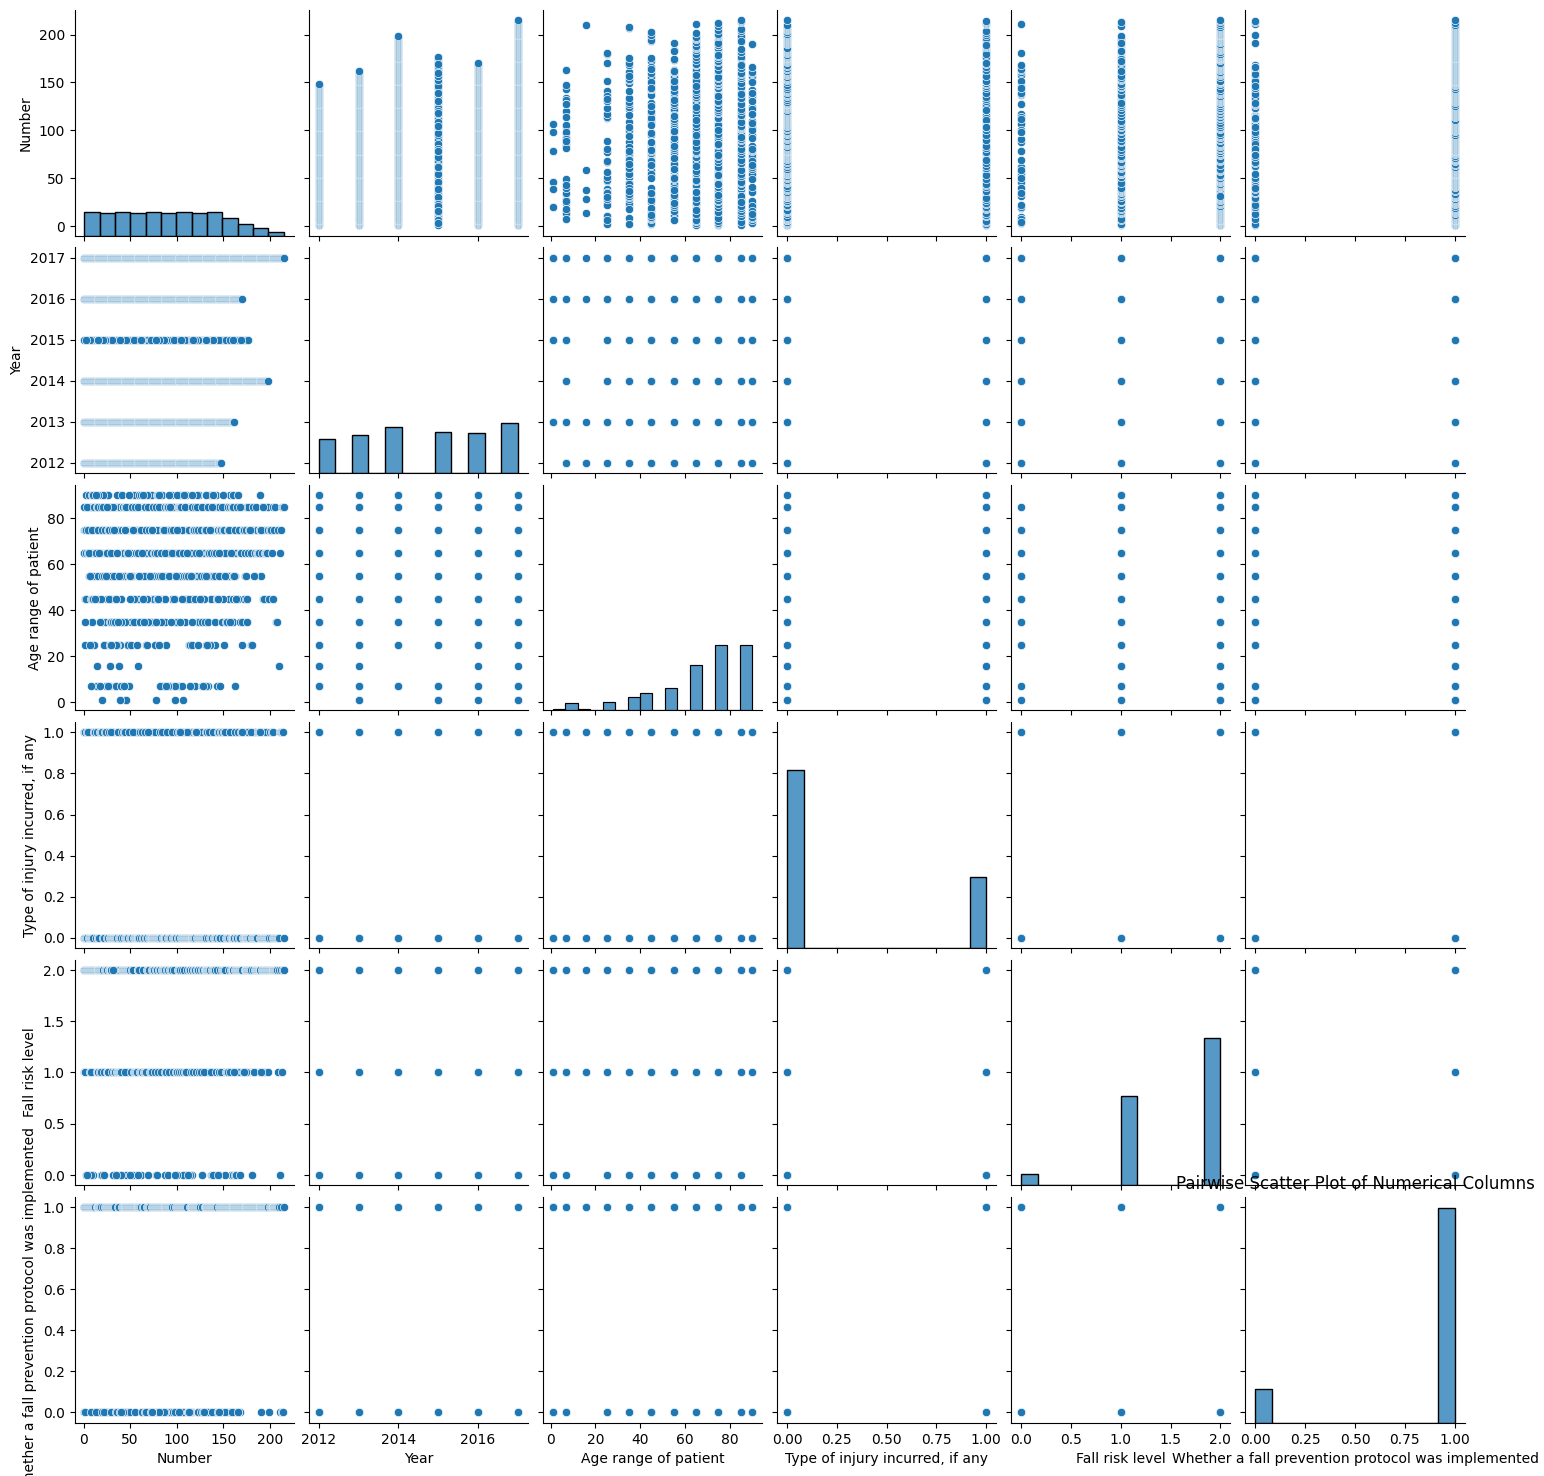

In [128]:
# Scatter plot (pairwise)
plt.figure(figsize=(10, 6))
sns.pairplot(df[numerical_cols])
plt.title('Pairwise Scatter Plot of Numerical Columns')
plt.show()

# Data Pre-processing

In [129]:
X = df.drop(columns=['Type of injury incurred, if any', 'Severity of incident', 'Number', 'Date of incident', 'Birth decade of patient', 'Weekday of incident'])
y = df['Type of injury incurred, if any']

X

,Year,Shift,Hospital department or location of incident,Age range of patient,Presence of companion at time of incident,Location or environment in which the incident ocurred,Fall risk level,Reason for incident,Whether a fall prevention protocol was implemented,Involvement of medication associated with fall risk,Sex,Whether a restraint prescription was given,Whether a physical therapy prescription was given
0,2012,Afternoon,diagnostic support,65.0,No,Waiting room,1,Loss of balance,0,No,Female,No,Yes
1,2012,Night,inpatient units,45.0,No,Room,1,Trip,1,No,Female,No,Yes
2,2012,Afternoon,emergency depart,85.0,Yes/Family,Room,2,Trip,1,Yes,Male,No,Yes
3,2012,Night,inpatient units,75.0,No,Room,2,Mental confusion,1,No,Male,No,Yes
4,2012,Night,inpatient units,75.0,Yes/Family,Bathroom/shower,1,Slip,1,No,Female,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,2017,Afternoon,oncology,65.0,No,Hallway,0,Trip,0,No,F,No,No
1066,2017,Night,inpatint units,75.0,Yes,Room,2,Loss of balance,1,Yes,F,No,No
1067,2017,Morning,oncology,85.0,Yes/Nurse,Others,1,Trip,0,No,M,No,No
1068,2017,Morning,oncology,85.0,Yes,Hallway,2,Trip,0,No,F,No,No


In [130]:
# Categorical Encoding
X = pd.get_dummies(X)
X

,Year,Age range of patient,Fall risk level,Whether a fall prevention protocol was implemented,Shift_Afternoon,Shift_Morning,Shift_Night,Hospital department or location of incident_A1,Hospital department or location of incident_Adult ACI,Hospital department or location of incident_Adult ICU,...,Sex_F,Sex_Female,Sex_M,Sex_Male,Sex_f,Whether a restraint prescription was given_No,Whether a restraint prescription was given_NÂO,Whether a restraint prescription was given_Yes,Whether a physical therapy prescription was given_No,Whether a physical therapy prescription was given_Yes
0,2012,65.0,1,0,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
1,2012,45.0,1,1,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
2,2012,85.0,2,1,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
3,2012,75.0,2,1,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,2012,75.0,1,1,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,2017,65.0,0,0,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False
1066,2017,75.0,2,1,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,True,False
1067,2017,85.0,1,0,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
1068,2017,85.0,2,0,False,True,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False


In [131]:
y

0       1.0
1       1.0
2       1.0
3       0.0
4       0.0
       ... 
1065    1.0
1066    1.0
1067    1.0
1068    1.0
1069    0.0
Name: Type of injury incurred, if any, Length: 1070, dtype: float64

In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#-------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#-------------------------------------
from scipy.stats import shapiro

#-------------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#-------------------------------------
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc

#-------------------------------------
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from statsmodels.stats.outliers_influence import variance_inflation_factor



#-------------------------------------
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

# Data Balancing

In [133]:
x_train_randOverSample = X.copy()
y_train_randOverSample = y.copy()

print("Before OverSampling- counts of label '0': {}".format(sum(y==0)))
print("Before OverSampling- counts of label '1': {} \n".format(sum(y==1)))
#print("Before OverSampling- counts of label '2': {} \n".format(sum(y==2)))
print("*******************************************************************")

randOverSample = RandomOverSampler(random_state=100,)
x_train_randOverSample, y_train_randOverSample = randOverSample.fit_resample(x_train_randOverSample, y_train_randOverSample.ravel())

print('After OverSampling with RandomOverSampler- x_train: {}'.format(x_train_randOverSample.shape))
print('After OverSampling with RandomOverSampler- y_train: {} \n'.format(y_train_randOverSample.shape))

print("After OverSampling with RandomOverSampler- counts of label '0': {}".format(sum(y_train_randOverSample==0)))
print("After OverSampling with RandomOverSampler- counts of label '1': {}".format(sum(y_train_randOverSample==1)))
#print("After OverSampling with RandomOverSampler- counts of label '2': {}".format(sum(y_train_randOverSample==2)))


X = x_train_randOverSample
y = y_train_randOverSample

Before OverSampling- counts of label '0': 764
Before OverSampling- counts of label '1': 306 

*******************************************************************
After OverSampling with RandomOverSampler- x_train: (1528, 95)
After OverSampling with RandomOverSampler- y_train: (1528,) 

After OverSampling with RandomOverSampler- counts of label '0': 764
After OverSampling with RandomOverSampler- counts of label '1': 764


In [135]:
x_train_smote = X.copy()
y_train_smote = y.copy()

print("Before OverSampling- counts of label '0': {}".format(sum(y==0)))
print("Before OverSampling- counts of label '1': {} \n".format(sum(y==1)))
print("*******************************************************************")

sm = SMOTE(random_state=100)
x_train_smote, y_train_smote = sm.fit_resample(x_train_smote, y_train_smote.ravel())

print('After OverSampling with SMOTE- x_train: {}'.format(x_train_smote.shape))
print('After OverSampling with SMOTE- y_train: {} \n'.format(y_train_smote.shape))

print("After OverSampling with SMOTE- counts of label '0': {}".format(sum(y_train_smote==0)))
print("After OverSampling with SMOTE- counts of label '1': {}".format(sum(y_train_smote==1)))


X = x_train_smote
y = y_train_smote




Before OverSampling- counts of label '0': 764
Before OverSampling- counts of label '1': 764 

*******************************************************************
After OverSampling with SMOTE- x_train: (1528, 95)
After OverSampling with SMOTE- y_train: (1528,) 

After OverSampling with SMOTE- counts of label '0': 764
After OverSampling with SMOTE- counts of label '1': 764


# Varaible Importance (Random Forest)

In [136]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X, y)

feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

df_feature_scores = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)


df_feature_scores.head(20)

,feature importance
Age range of patient,0.134362
Year,0.073896
Fall risk level,0.048027
Presence of companion at time of incident_No,0.032429
Reason for incident_Loss of balance,0.031366
Shift_Night,0.031072
Shift_Morning,0.030893
Sex_M,0.028973
Presence of companion at time of incident_Yes/Family,0.028752
Sex_F,0.028594


# Fitting Predictive Model

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Machine (SVM)

In [139]:
##########   SVM

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# parameter grid

params_grid = {
    'C': [1, 2, 4, 5, 6],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}



svm_model = SVC(random_state=42)


grid_search = GridSearchCV(estimator=svm_model, param_grid=params_grid, cv=5)


grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred_svm = best_estimator.predict(X_test_scaled)

# Evaluate the model
print("Best Parameters:", best_params)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

Best Parameters: {'C': 6, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Accuracy: 0.7041884816753927
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.66      0.69       189
         1.0       0.69      0.75      0.72       193

    accuracy                           0.70       382
   macro avg       0.71      0.70      0.70       382
weighted avg       0.71      0.70      0.70       382



# Random Forest (RF)

In [140]:
##########  Random Forest (RF)


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [10, 50,  100, 200, 300],
    'max_depth': [ 2, 4, 6, 10],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred_rf_best = best_rf_model.predict(X_test_scaled)

# Evaluate the best model
print("Best Random Forest Parameters:", best_params)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_best))


Best Random Forest Parameters: {'max_depth': 10, 'n_estimators': 200}
Random Forest Accuracy: 0.7774869109947644
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.75      0.77       189
         1.0       0.77      0.80      0.78       193

    accuracy                           0.78       382
   macro avg       0.78      0.78      0.78       382
weighted avg       0.78      0.78      0.78       382



# Logistic Regression (For Interpretability)

In [141]:
from sklearn.linear_model import LogisticRegression


logistic_model = LogisticRegression(random_state=42)


param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty norm
}


grid_search_logistic = GridSearchCV(estimator=logistic_model, param_grid=param_grid_logistic, cv=5, scoring='accuracy')

grid_search_logistic.fit(X_train_scaled, y_train)


best_params_logistic = grid_search_logistic.best_params_
best_logistic_model = grid_search_logistic.best_estimator_


y_pred_logistic_best = best_logistic_model.predict(X_test_scaled)

# Evaluate the model
print("Best Logistic Regression Parameters:", best_params_logistic)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic_best))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic_best))


Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2'}
Logistic Regression Accuracy: 0.6020942408376964
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.61      0.60       189
         1.0       0.61      0.60      0.60       193

    accuracy                           0.60       382
   macro avg       0.60      0.60      0.60       382
weighted avg       0.60      0.60      0.60       382



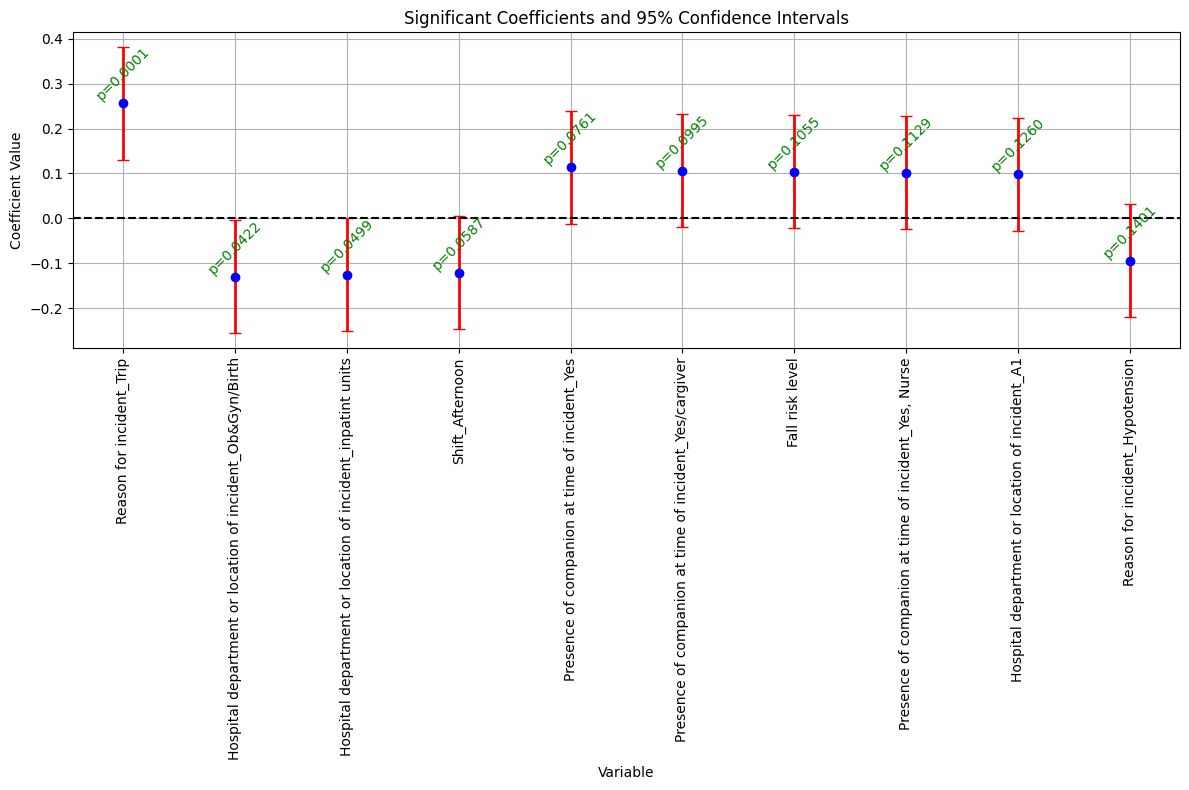

Significant Coefficients (P-Value < 0.05):
                                              Feature  Coefficient  \
82                           Reason for incident_Trip     0.256684   
12  Hospital department or location of incident_Ob...    -0.130429   
28  Hospital department or location of incident_in...    -0.125909   
4                                     Shift_Afternoon    -0.121407   
33      Presence of companion at time of incident_Yes     0.113902   
42  Presence of companion at time of incident_Yes/...     0.105794   
2                                     Fall risk level     0.103934   
35  Presence of companion at time of incident_Yes,...     0.101793   
7      Hospital department or location of incident_A1     0.098257   
73                    Reason for incident_Hypotension    -0.094745   

    Std. Error   Z-Score   P-Value  
82    0.064215  3.997268  0.000064  
12    0.064215 -2.031136  0.042241  
28    0.064215 -1.960753  0.049908  
4     0.064215 -1.890634  0.058673  
3

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Extract feature names
feature_names = X_train.columns

# Extract coefficients and their standard errors
coefficients = best_logistic_model.coef_.flatten()
std_errors = np.std(X_train_scaled, 0) * np.std(coefficients)

# Calculate z-scores
z_scores = coefficients / std_errors

# Calculate p-values
p_values = [2 * (1 - norm.cdf(np.abs(z))) for z in z_scores]

# Create DataFrame for coefficient data
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Std. Error': std_errors,
    'Z-Score': z_scores,
    'P-Value': p_values
})

# Filter coefficients with p-value
significant_coefs = coef_df[coef_df['P-Value'] < 0.15]

# Sort significant coefficients by absolute coefficient value
significant_coefs = significant_coefs.reindex(significant_coefs['Coefficient'].abs().sort_values(ascending=False).index)

# Create plot
plt.figure(figsize=(12, 8))

# Plot coefficients
plt.errorbar(range(len(significant_coefs)), significant_coefs['Coefficient'], yerr=1.96 * significant_coefs['Std. Error'], fmt='o', color='b', ecolor='r', elinewidth=2, capsize=4)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Significant Coefficients and 95% Confidence Intervals')
plt.xlabel('Variable')
plt.ylabel('Coefficient Value')
plt.xticks(range(len(significant_coefs)), significant_coefs['Feature'], rotation=90)
plt.grid(True)

# Add p-values to the plot
for i, (x, y, p_val) in enumerate(zip(range(len(significant_coefs)), significant_coefs['Coefficient'], significant_coefs['P-Value'])):
    plt.text(x, y, f'p={p_val:.4f}', ha='center', va='bottom', rotation=45, color='green')

plt.tight_layout()
plt.show()

# Display significant coefficients
print("Significant Coefficients (P-Value < 0.05):")
print(significant_coefs)


## Voting Classifier (For Higher Predictive Accuracy)




In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier



rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
svc_model = SVC(kernel='rbf', C=14.0, gamma= 'scale', probability=True, random_state=42)
mlp_model = MLPClassifier(activation= 'tanh', alpha= 0.0001, hidden_layer_sizes= (100,100), max_iter = 500, solver= 'adam', random_state=42)
#mlp_model = MLPClassifier(activation= 'relu', alpha= 0.0001, learning_rate= 'adaptive', hidden_layer_sizes= (200, ), solver= 'adam', random_state=42)
#lr_model = LogisticRegression(C=9.0, solver='liblinear', penalty= 'l2', random_state=42)

estimators = [('random_forest', rf_model),
              ('neural_net', mlp_model)
              #('support_vector_classifier', svc_model)
              #('logistic', lr_model)
]


voting_clf = VotingClassifier(estimators=estimators, voting='soft')


voting_clf.fit(X_train_scaled, y_train)


y_pred_voting = voting_clf.predict(X_test_scaled)

# Evaluate the model
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Voting Classification Report:\n", classification_report(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.8219895287958116
Voting Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.73      0.80       189
         1.0       0.78      0.91      0.84       193

    accuracy                           0.82       382
   macro avg       0.83      0.82      0.82       382
weighted avg       0.83      0.82      0.82       382



AUC Score: 0.9189489267209474


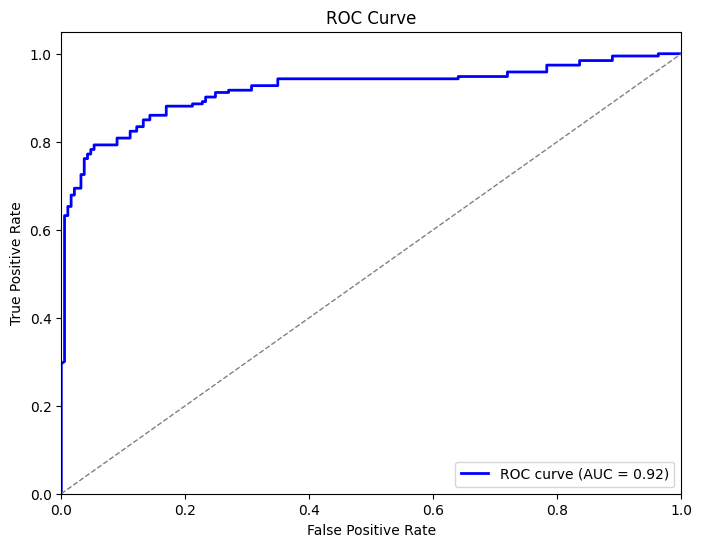

In [145]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc


clf_name = voting_clf
#clf_name = best_rf_model


# Predict probabilities for each model
probs = np.array([clf.predict_proba(X_test_scaled) for clf in clf_name.estimators_])

# Combine probabilities (e.g., by taking the mean)
combined_probs = np.mean(probs, axis=0)

# Make a hard decision based on combined probabilities
combined_preds = np.argmax(combined_probs, axis=1)

# Calculate the AUC score
auc = roc_auc_score(y_test, combined_probs[:, 1])
print("AUC Score:", auc)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, combined_probs[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Plot random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()